<a href="https://colab.research.google.com/github/MaeSantos/CCMACLRL_EXERCISES_COM232ML/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('book.csv')

In [ ]:
df.head()

,Name,Post/Shares Frequently,Active,Replies to comments,# of friends/followers,Personality
0,Raven,1,1,1,1000,1
1,Danna,1,1,1,819,1
2,Chibi,0,0,0,149,0
3,Ian,1,1,1,1500,1
4,Ann,1,1,1,473,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    99 non-null     object
 1   Post/Shares Frequently  99 non-null     int64 
 2   Active                  99 non-null     int64 
 3   Replies to comments     99 non-null     int64 
 4   # of friends/followers  99 non-null     int64 
 5   Personality             99 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [ ]:
df.value_counts()

,,,,,,count
Name,Post/Shares Frequently,Active,Replies to comments,# of friends/followers,Personality,
Aeviel,0,0,0,248,0,1
Airah,1,1,1,2400,1,1
Aleah,0,1,0,276,0,1
Alexander,0,0,1,1700,0,1
Allaina,1,1,1,3300,1,1
...,...,...,...,...,...,...
Xian,1,0,0,578,0,1
Yanick,1,1,1,2600,1,1
Zette,1,1,1,4900,1,1


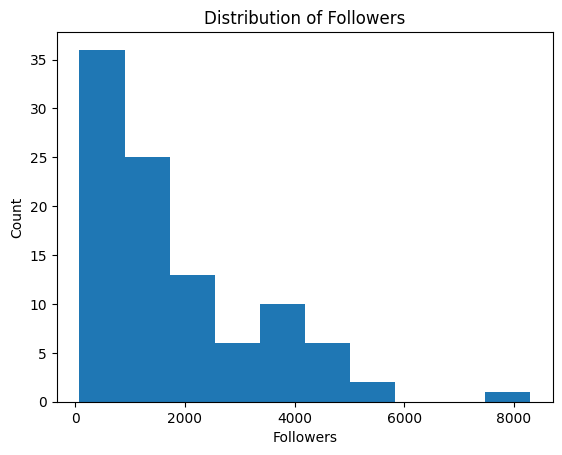

In [ ]:
plt.hist(df["# of friends/followers"])
plt.xlabel("Followers")
plt.ylabel("Count")
plt.title("Distribution of Followers")
plt.show()

In [ ]:
X = df.drop(columns=['Name', 'Personality'])
y = df['Personality'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(79, 4)
(79,)
(20, 4)
(20,)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred = knn.predict(X_test)

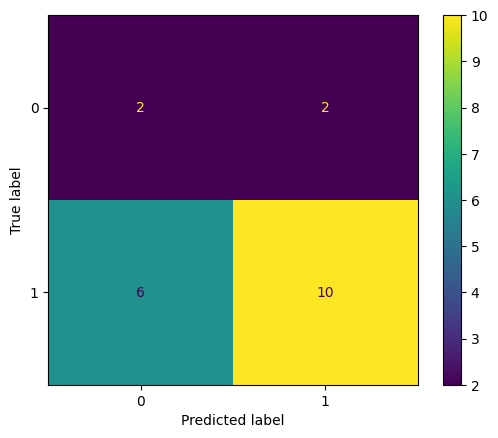

In [ ]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.6

In [ ]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.5   0.625]


In [ ]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.25       0.83333333]


In [ ]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.33333333 0.71428571]


In [ ]:
new_data = pd.DataFrame([[0, 1, 0, 100]], columns=X_train.columns)

knn.predict(new_data)

array([0])